# Introduction to TensorFlow, fitting point by point

In this notebook, we introduce TensorFlow by fitting a line of the form y=m\*x+b point by point. This is a derivation of Jared Ostmeyer's [Naked Tensor](https://github.com/jostmey/NakedTensor/) code. 

#### Load dependencies and set seeds for reproducibility

In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
tf.set_random_seed(42)

#### Create a very small data set

In [2]:
xs = [0., 1., 2., 3., 4., 5., 6., 7.] # feature (independent variable)
ys = [-.82, -.94, -.12, .26, .39, .64, 1.02, 1.] # labels (dependent variable)

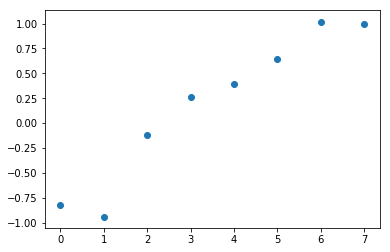

In [3]:
fig, ax = plt.subplots()
_ = ax.scatter(xs, ys)

#### Define *variables* -- the model parameters we'll learn -- and initialize them with "random" values

In [4]:
m = tf.Variable(-0.5)
b = tf.Variable(1.0)

#### One single point at a time, define the error between the true label and the model's prediction of the label

In [5]:
total_error = 0.0
for x,y in zip(xs, ys):
    y_model = m*x + b
    total_error += (y-y_model)**2

#### Define optimizer as SSE-minimizing gradient descent

In [6]:
optimizer_operation = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(total_error)

#### Define an operator that will initialize the graph with all available global variables

In [7]:
initializer_op = tf.global_variables_initializer()

#### With the computational graph designed, we initialize a session to execute it

In [8]:
with tf.Session() as sess:
    
    sess.run(initializer_op)
    
    n_epochs = 10
    
    for iteration in range(n_epochs):
        sess.run(optimizer_operation)
    
    slope, intercept = sess.run([m, b])

In [9]:
slope

-265.02151

In [10]:
intercept

-53.551777

#### Calculate the predicted model outputs given the inputs xs

In [11]:
y_hat = slope*np.array(xs) + intercept

In [12]:
pd.DataFrame(list(zip(ys, y_hat)), columns=['y', 'y_hat'])

,y,y_hat
0,-0.82,-53.551777
1,-0.94,-318.573292
2,-0.12,-583.594807
3,0.26,-848.616322
4,0.39,-1113.637836
5,0.64,-1378.659351
6,1.02,-1643.680866
7,1.00,-1908.702381


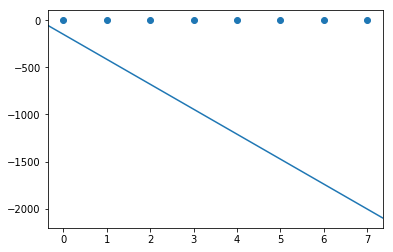

In [13]:
fig, ax = plt.subplots()

ax.scatter(xs, ys)
x_min, x_max = ax.get_xlim()
y_min, y_max = intercept, intercept + slope*(x_max-x_min)

ax.plot([x_min, x_max], [y_min, y_max])
_ = ax.set_xlim([x_min, x_max])